In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
# import wordcloud
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('tweet_data/tweets_2020_04.csv')
data.head()

,tweet_id,location,date,likes,retweets,text
0,1.246230e+18,"Pomona, CA",4/4/2020,89921,34665,A day without Hispanics .... this country coul...
1,1.252680e+18,"Santa Barbara, CA",4/21/2020,34308,5245,XO face masks are back to raise money and I’ll...
2,1.252390e+18,"California, USA",4/21/2020,0,0,@ImKingGinger Well aren't you special? My rela...
3,1.251870e+18,"Arizona, USA",4/19/2020,4,0,@seanhannity If I was to stay home and eat ice...
4,1.247010e+18,"Medford, MA",4/6/2020,0,0,"@MisagaLion @tedpanos Yup, CT. Governor spoke ..."


In [3]:
# check most frequent locations
loc0 = [loc.lower() for loc in data['location']] # whole
loc2 = [loc.split(', ')[1].lower() for loc in data['location']] # state
loc1 = [loc.split(', ')[0].lower() for loc in data['location']] # city
# if 2nd part of location is usa -> get 1st part as state

freq_loc = sorted(loc0)
loc_freq = Counter(freq_loc)
loc_freq.most_common()

[('california, usa', 223),
 ('los angeles, ca', 167),
 ('new york, ny', 167),
 ('washington, dc', 145),
 ('florida, usa', 141),
 ('texas, usa', 134),
 ('new york, usa', 108),
 ('chicago, il', 100),
 ('atlanta, ga', 86),
 ('houston, tx', 86),
 ('seattle, wa', 82),
 ('san francisco, ca', 73),
 ('pennsylvania, usa', 68),
 ('dallas, tx', 65),
 ('austin, tx', 63),
 ('brooklyn, ny', 63),
 ('ohio, usa', 62),
 ('las vegas, nv', 60),
 ('michigan, usa', 60),
 ('philadelphia, pa', 59),
 ('san diego, ca', 59),
 ('new jersey, usa', 57),
 ('georgia, usa', 55),
 ('boston, ma', 54),
 ('north carolina, usa', 53),
 ('virginia, usa', 51),
 ('portland, or', 50),
 ('illinois, usa', 46),
 ('arizona, usa', 45),
 ('massachusetts, usa', 45),
 ('miami, fl', 44),
 ('washington, usa', 44),
 ('denver, co', 43),
 ('colorado, usa', 37),
 ('minnesota, usa', 37),
 ('baltimore, md', 36),
 ('pittsburgh, pa', 36),
 ('maryland, usa', 35),
 ('phoenix, az', 35),
 ('detroit, mi', 32),
 ('nashville, tn', 32),
 ('minneapolis, 

In [4]:
mask_data = pd.read_csv('mask_mandate_no_na_smaller.csv')
mask_data['State_Tribe_Territory'].unique()
# mask_data['County_Name'].unique()
# mask_data['County']
# freq_counties = Counter(mask_data['County_Name'])
# freq_counties.most_common()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'DC', 'CT', 'FL', 'DE', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MA', 'MD',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'VI'], dtype=object)

In [15]:
# same but for 4 month data
four_mon = pd.read_csv('tweet_data/model_test_data.csv')
freq_states = Counter(four_mon['state'])
freq_states 

Counter({'California': 4165,
         'Arizona': 699,
         'Massachusetts': 756,
         'Puerto Rico': 87,
         'Texas': 2319,
         'Florida': 1906,
         'New Jersey': 563,
         'Maryland': 542,
         'Virginia': 671,
         'Roodhouse': 1,
         'Missouri': 394,
         'Pennsylvania': 1020,
         'Oklahoma': 235,
         'New York': 2111,
         'Alaska': 60,
         'Louisiana': 253,
         'South Carolina': 279,
         'chino hills': 1,
         'Santa Fe': 1,
         'CO and Houston': 2,
         'Stolen Minsi land in NY': 2,
         'Southern California': 10,
         'Washington': 898,
         'Rural Oregon': 1,
         'Tennessee': 517,
         'Indiana': 402,
         'Georgia': 789,
         'Colorado': 578,
         'Illinois': 924,
         'Ohio': 829,
         'St. Louis (County)': 2,
         'New Mexico': 164,
         'Nevada': 347,
         'Nova Iorque': 8,
         'Kentucky': 257,
         'Wisconsin': 358,
         'O

In [ ]:
# check likes distribution
sub_data = data.loc[data['likes']<100,]
plt.hist(sub_data.likes,bins=50)

In [4]:
all_data = pd.read_csv('complete_data.csv')
mentions_mask_data = all_data.loc[all_data['mentions_mask']==True,:]
mentions_mask_data[]

,tweet_id,location,date,likes,retweets,text,index,city,state,is_state,state_abbr,city_and_state,State_Tribe_Territory,Face_Masks_Required_in_Public,Polarity,Subjectivity,CA,LA,tokens,mentions_mask
1,1.250000e+18,"Santa Barbara, CA",4/21/2020,34308,5245,XO face masks are back to raise money and Iâ...,2,Santa Barbara,California,False,CA,"Santa Barbara, California",CA,No,0.000000,0.000000,Yes,No,"['XO', 'face', 'masks', 'are', 'back', 'to', '...",True
12,1.250000e+18,"Virginia, USA",4/23/2020,1359,1293,Feds get 1 million N95 masks bound for Miami-D...,13,Not City,Virginia,True,VA,"Not City, Virginia",VA,No,0.000000,0.000000,No,No,"['Feds', 'get', '1', 'million', 'N95', 'masks'...",True
158,1.250000e+18,"Ipswich, MA",4/11/2020,29,8,1 million % agree w/ this @lancet editorial &a...,159,Ipswich,Massachusetts,False,MA,"Ipswich, Massachusetts",MA,No,-0.127778,0.355556,No,No,"['1', 'million', '%', 'agree', 'w/', '@lancet'...",True
167,1.250000e+18,"Michigan, USA",4/10/2020,64472,9283,"Medics, bruh. \r\n\r\nThese medics taped photo...",168,Not City,Michigan,True,MI,"Not City, Michigan",MI,No,0.375000,0.500000,No,No,"['Medics', ',', 'bruh', '.', 'These', 'medics'...",True
186,1.250000e+18,"Texas, USA",4/17/2020,10417,7561,"If true, this is why 45 removed the selected I...",187,Not City,Texas,True,TX,"Not City, Texas",TX,No,0.350000,0.650000,No,No,"['If', 'true', ',', 'this', 'is', 'why', '45',...",True


### Check dates complete

<AxesSubplot:xlabel='date', ylabel='likes'>

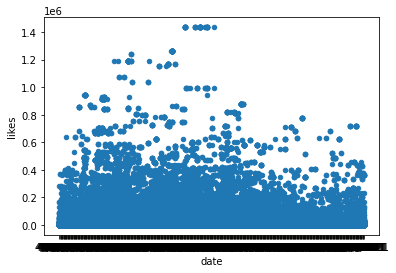

In [4]:
all_data = pd.read_csv('complete_data_cases.csv')
all_data.head()
all_data.plot.scatter(x='date',y='likes')